# Ensemble_Test2

In [1]:
#Clear all variables
%reset

In [2]:
#Import relevant packages.

import numpy as np
from scipy import stats
# Import curve fitting package from scipy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from tqdm import tqdm
from statsmodels.tsa.stattools import adfuller #Test stationary data
#from fbm import fbm, fgn
# from matplotlib import rc
#import colorama
from fbm import fbm, fgn

plt.style.use('ggplot')  # Set plot style

In [3]:
%%capture

%run Diffusion-Entropy-Analysis/dea.ipynb

%run Analysis_Functions.ipynb

### Now lets look at a random walk single trajectory vs ensemble

Text(0, 0.5, 'x')

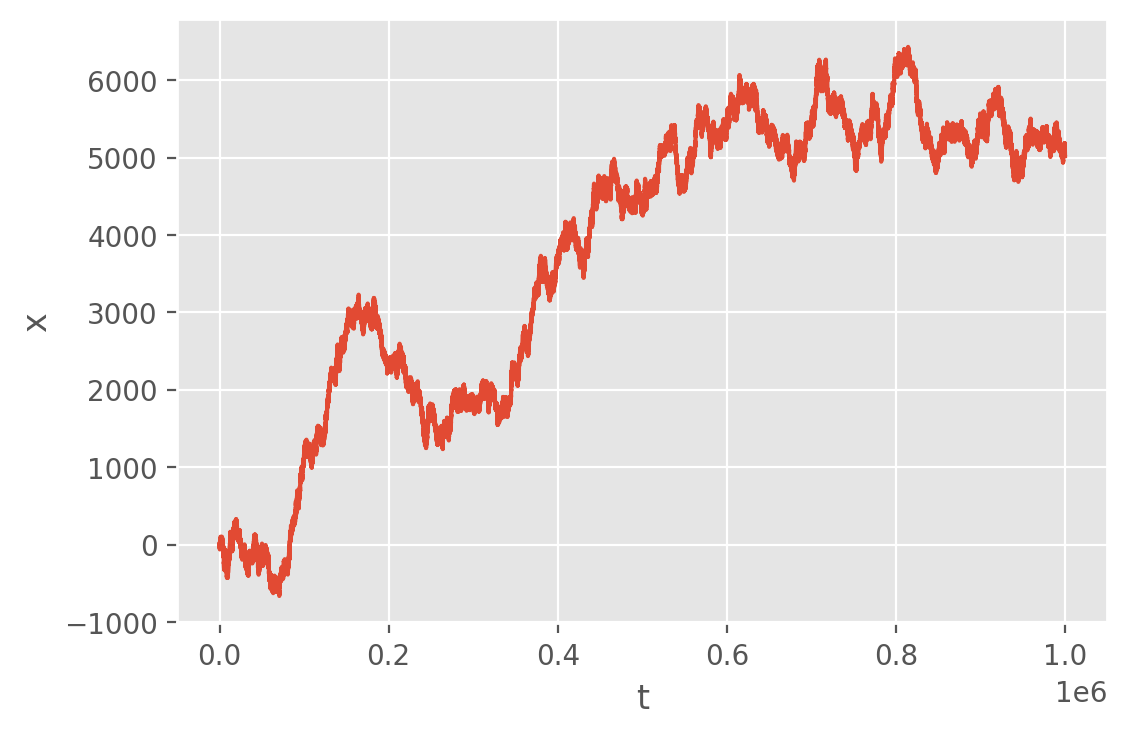

In [4]:
# Now let's look at a random walk

def random_walk(start, L, lamb):
    fluct = np.concatenate(([start],lamb*np.random.normal(loc=0.0, scale=np.sqrt(10.0), size=(L-1))))
    return np.cumsum(fluct)

start = 0.0001
L = 1*10**6
step_constant = 1
lamb = 1/step_constant

x = random_walk(start, L, lamb)

plt.plot(x)
plt.xlabel('t')
plt.ylabel('x')

In [25]:
number_of_points = 100 #may not repeat
data = x

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 92/92 [00:05<00:00, 16.64it/s]


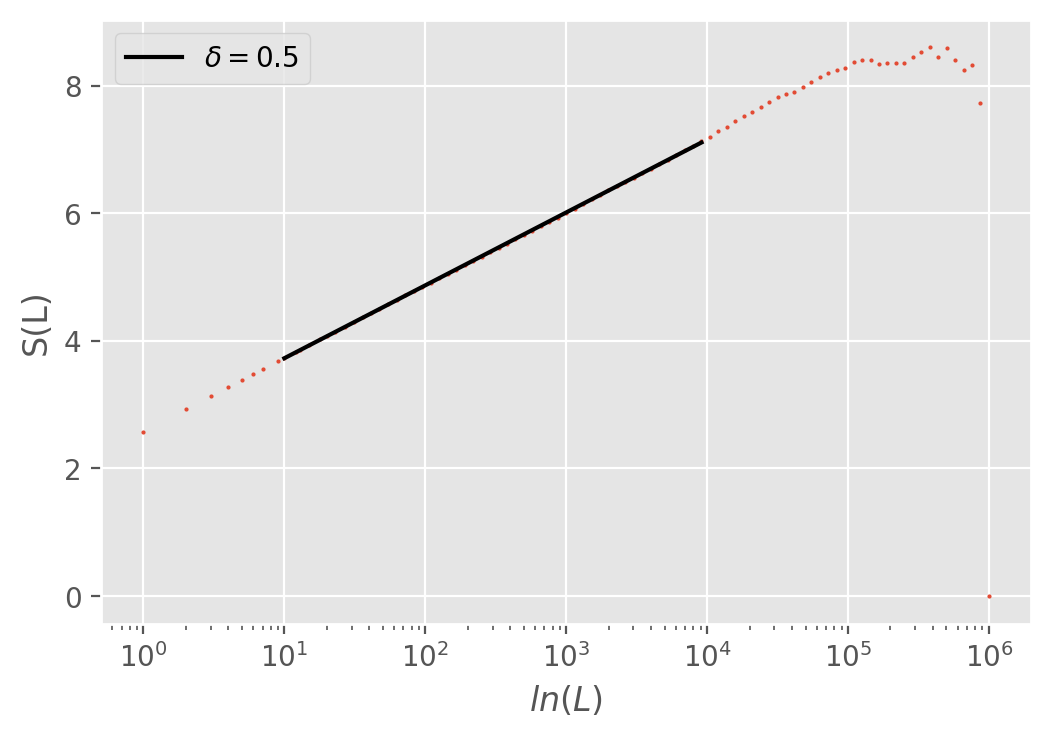

In [26]:
#for fitting and to get the scaling
start = 1*10**1
stop = 1*10**4
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [27]:
data = x
stripes = 500
show_plot = False
window_type = 'moving'

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
#window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
taus = np.diff(np.where(np.array(event_array[0]) == 1))
window_lengths = np.unique(np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array[0])==1)[0][-1]),100))).astype(int))
s, L = entropy(diffusion_trajectory, window_lengths, window_type)

100%|██████████| 92/92 [00:01<00:00, 62.06it/s]


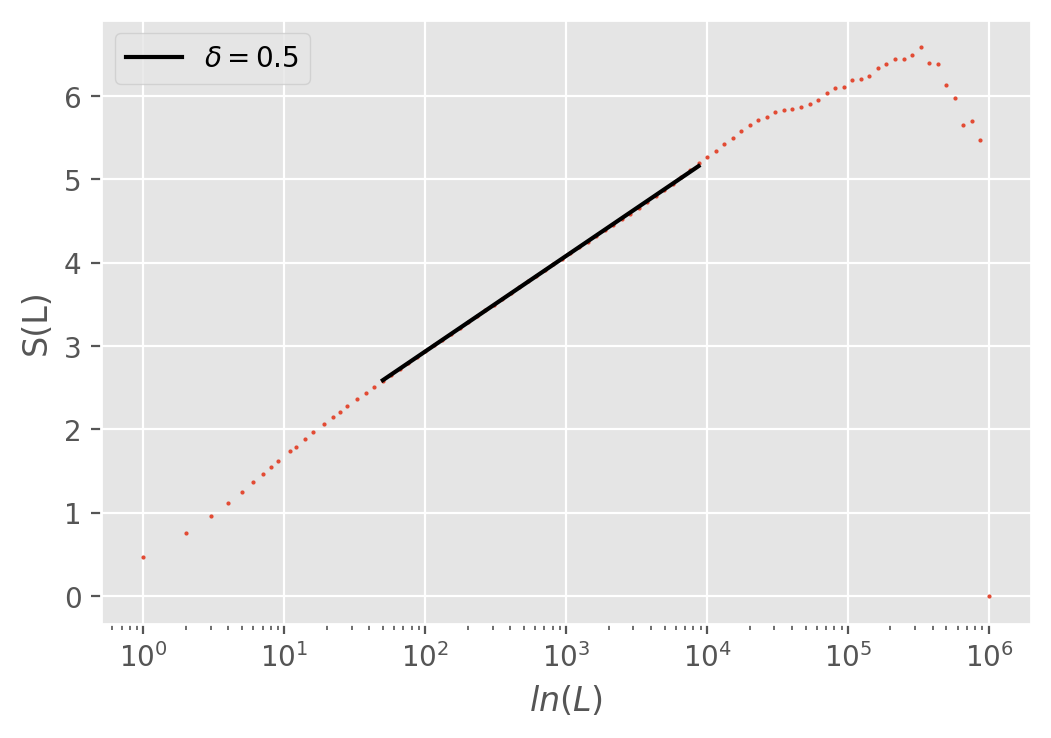

In [28]:
#for fitting and to get the scaling
start = 5*10**1
stop = 1*10**4
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

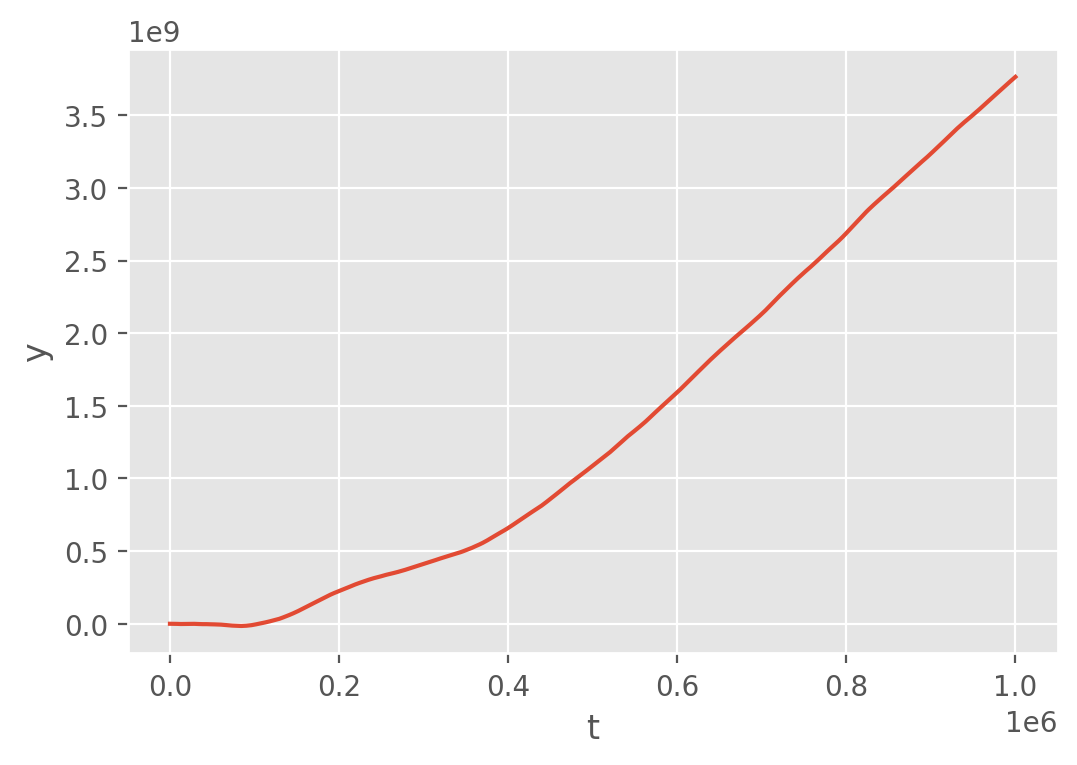

In [5]:
y = np.cumsum(x)
plt.xlabel('t')
plt.ylabel('y')
_ = plt.plot(y)

In [6]:
number_of_points = 100 #may not repeat
data = y

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 92/92 [00:05<00:00, 16.99it/s]


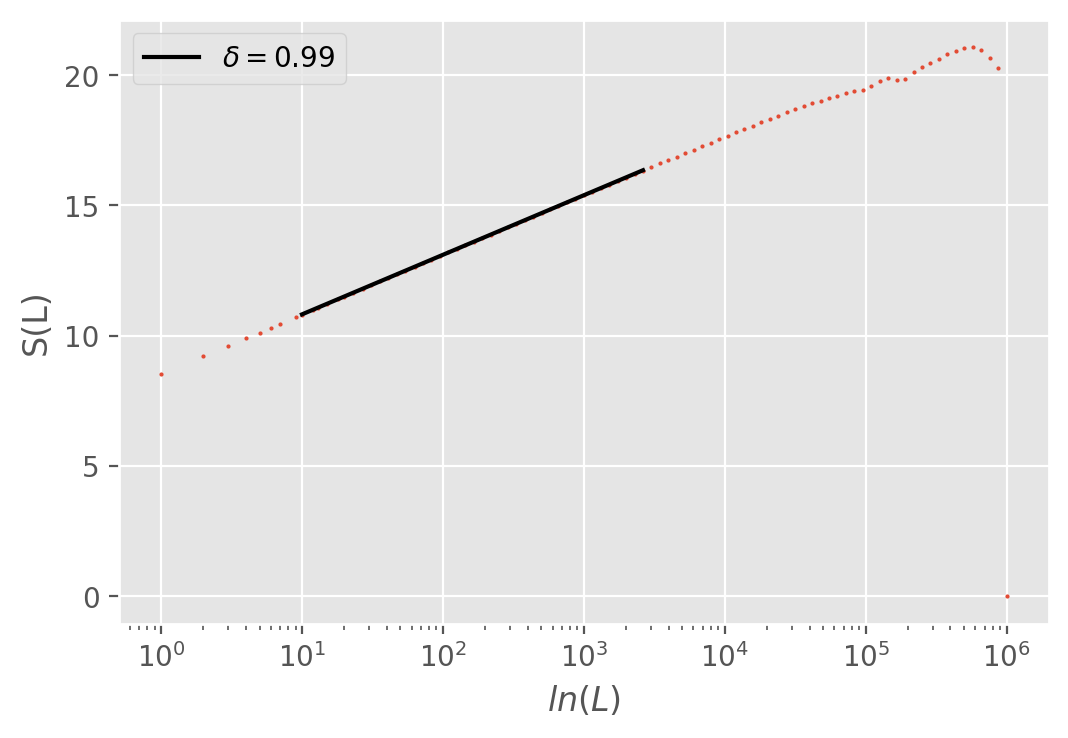

In [7]:
#for fitting and to get the scaling
start = 1*10**1
stop = 3*10**3
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
#plt.plot([], [], linestyle='', label='$\mu = $'+str(np.round(mu, 2)))
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [31]:
data = y
stripes = 1000
show_plot = False
window_type = 'moving'

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
#window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
taus = np.diff(np.where(np.array(event_array[0]) == 1))
window_lengths = np.unique(np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array[0])==1)[0][-1]),100))).astype(int))
s, L = entropy(diffusion_trajectory, window_lengths, window_type)

100%|██████████| 100/100 [00:01<00:00, 59.09it/s]


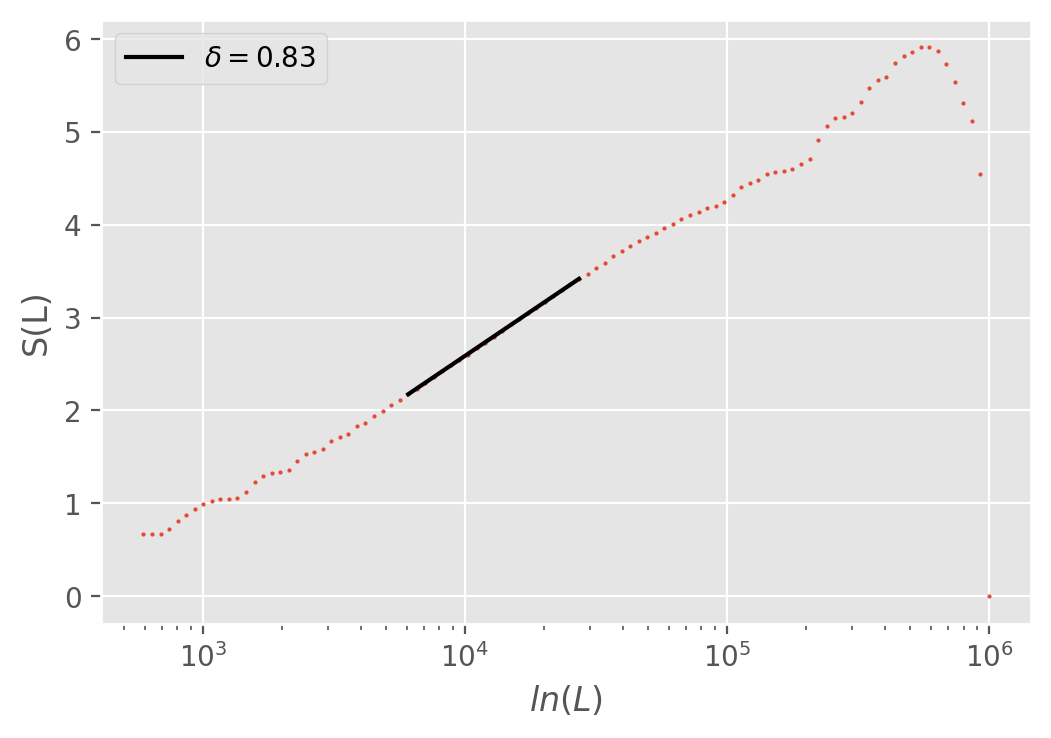

In [32]:
#for fitting and to get the scaling
start = 6*10**3
stop = 3*10**4
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
#plt.plot([], [], linestyle='', label='$\mu = $'+str(np.round(mu, 2)))
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

Note that the $\delta = 1$ instead of $\delta = 1.5$

We need to consider that y is nonstationary. 

In [33]:
# First we will consider drawing may trajectories with the random walk function.

step_constants = np.ones(10**4)

start = 0.0001
L = 10**4
lamb = 1/step_constants

#y_trajs = np.zeros([len(lamb),L])
x_trajs = np.zeros([len(lamb),L])


for q in range(len(lamb)):
    x_trajs[q] = random_walk(start, L, lamb[q]) 
    #y_trajs[q] = np.cumsum(random_walk(start, L, lamb[q]))
    
    
#plt.plot(x_trajs)

Text(0, 0.5, 'x')

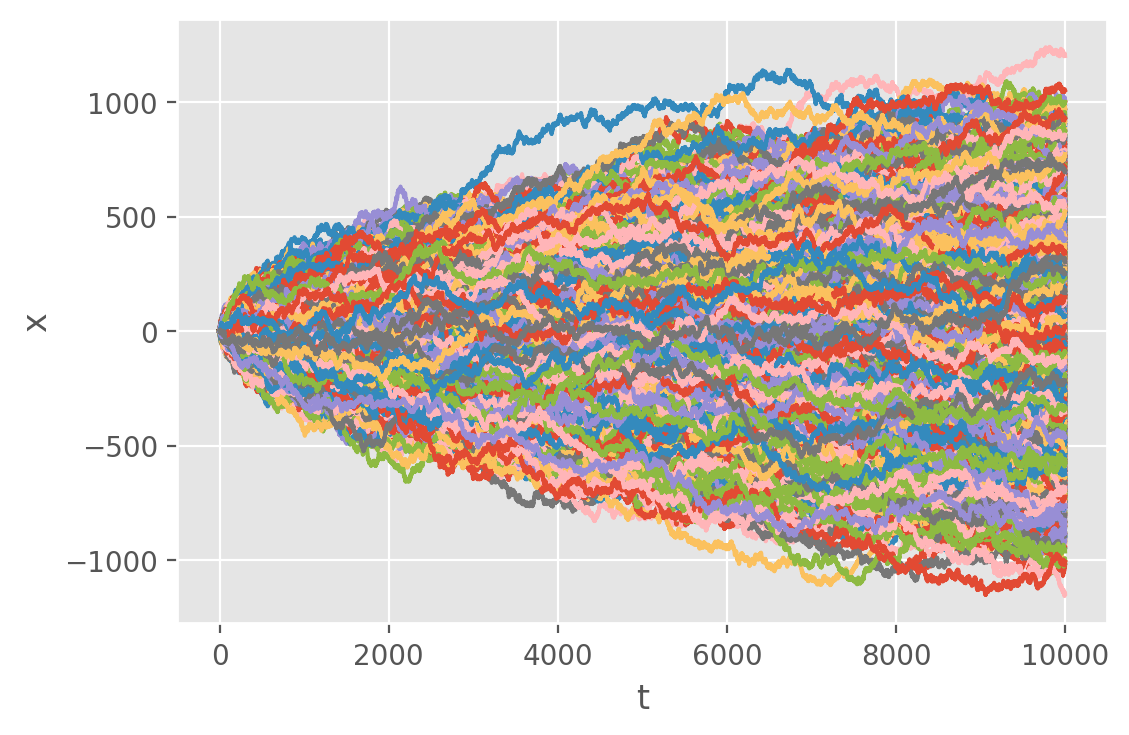

In [34]:
_ = plt.plot(x_trajs.T)
plt.xlabel('t')
plt.ylabel('x')

In [35]:
number_of_points = 100 #may not repeat
data = x_trajs

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 83/83 [00:00<00:00, 541.28it/s]


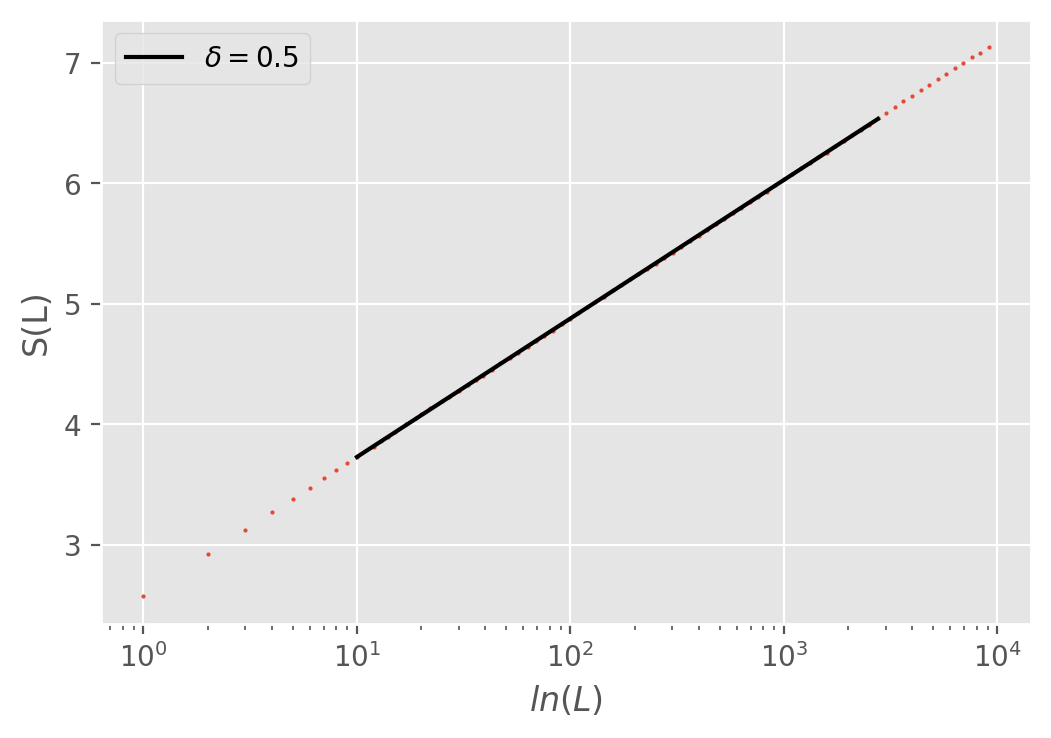

In [36]:
#for fitting and to get the scaling
start = 1*10**1
stop = 3*10**3
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
#plt.plot([], [], linestyle='', label='$\mu = $'+str(np.round(mu, 2)))
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [39]:
data = x_trajs
stripes = 1000
show_plot = False
window_type = 'growing'

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
#window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
taus = np.diff(np.where(np.array(event_array[0]) == 1))
window_lengths = np.unique(np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array[0])==1)[0][-1]),100))).astype(int))
s, L = entropy(diffusion_trajectory, window_lengths, window_type)

100%|██████████| 84/84 [00:00<00:00, 1139.47it/s]


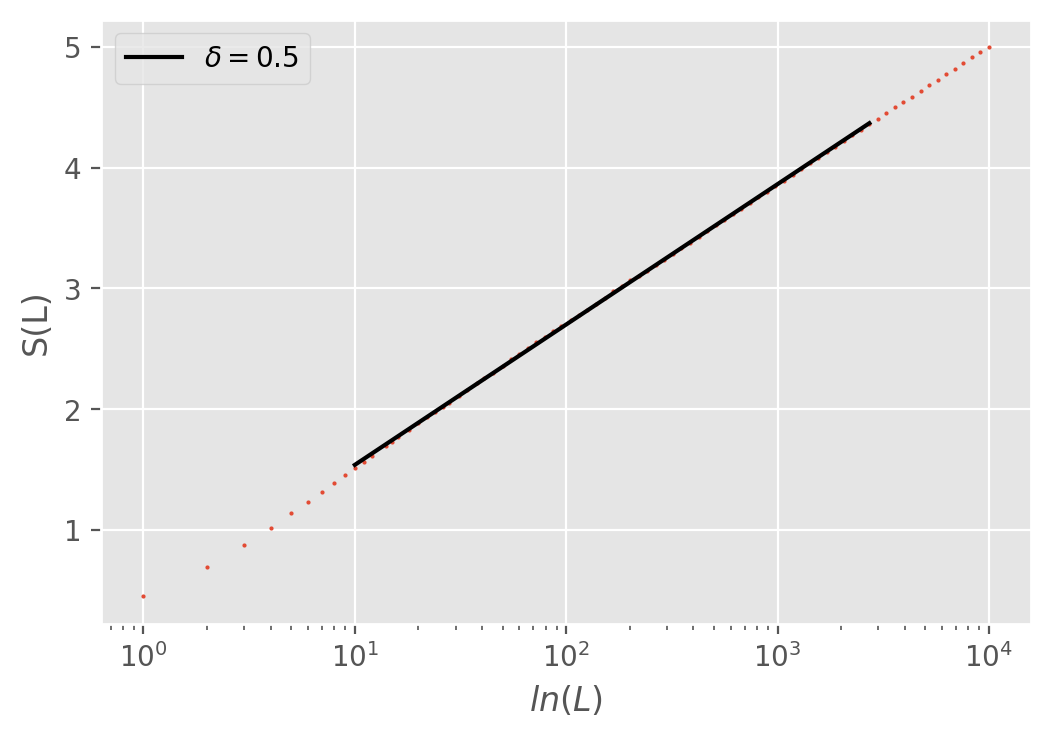

In [40]:
#for fitting and to get the scaling
start = 1*10**1
stop = 3*10**3
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
#plt.plot([], [], linestyle='', label='$\mu = $'+str(np.round(mu, 2)))
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

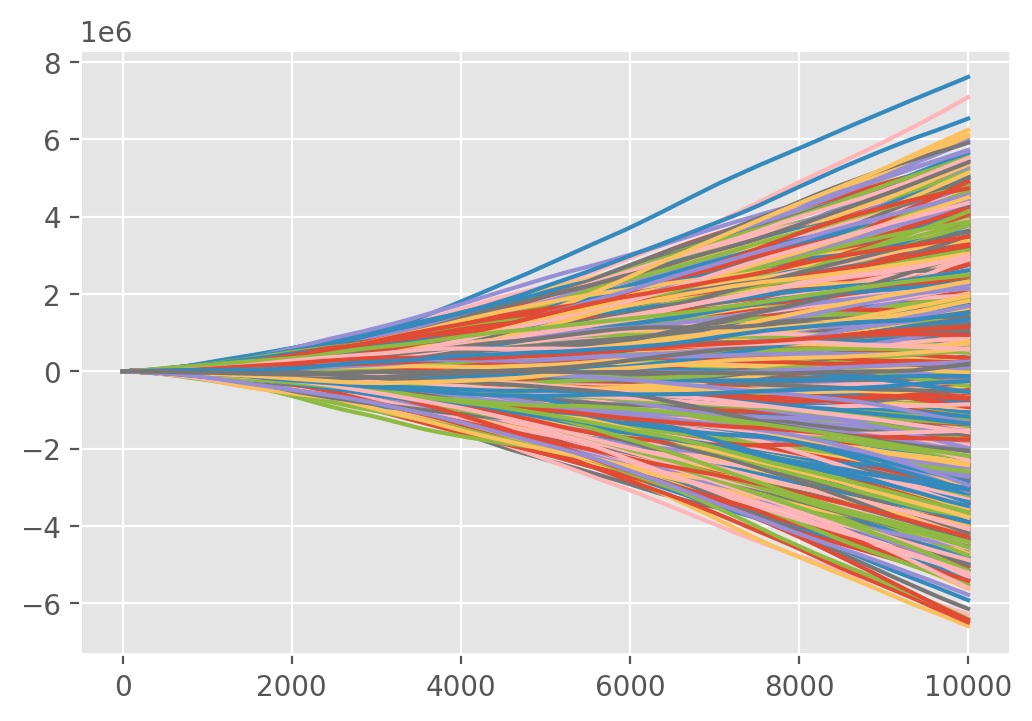

In [47]:
y_trajs = np.cumsum(x_trajs,1)
_=plt.plot(y_trajs.T)

In [48]:
number_of_points = 100 #may not repeat
data = y_trajs

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 83/83 [00:00<00:00, 552.52it/s]


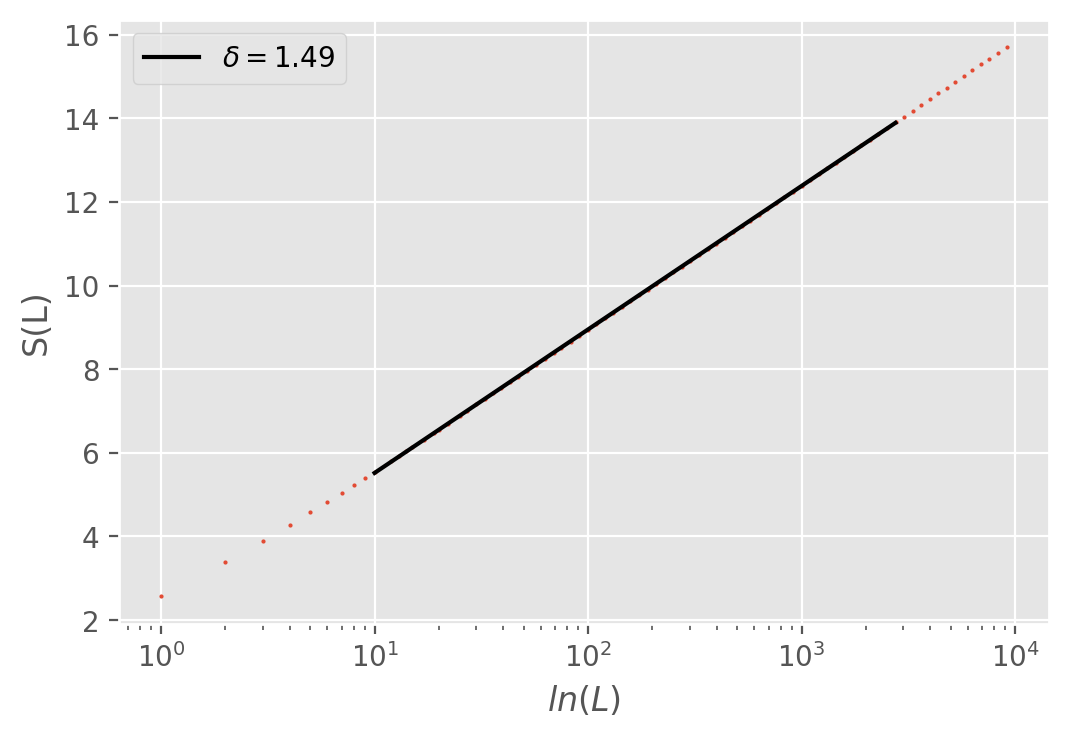

In [49]:
#for fitting and to get the scaling
start = 1*10**1
stop = 3*10**3
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
#plt.plot([], [], linestyle='', label='$\mu = $'+str(np.round(mu, 2)))
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [53]:
data = y_trajs
stripes = 2000
show_plot = False
window_type = 'growing'

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
#window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
taus = np.diff(np.where(np.array(event_array[0]) == 1))
window_lengths = np.unique(np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array[0])==1)[0][-1]),100))).astype(int))
s, L = entropy(diffusion_trajectory, window_lengths, window_type)

100%|██████████| 100/100 [00:00<00:00, 1781.83it/s]


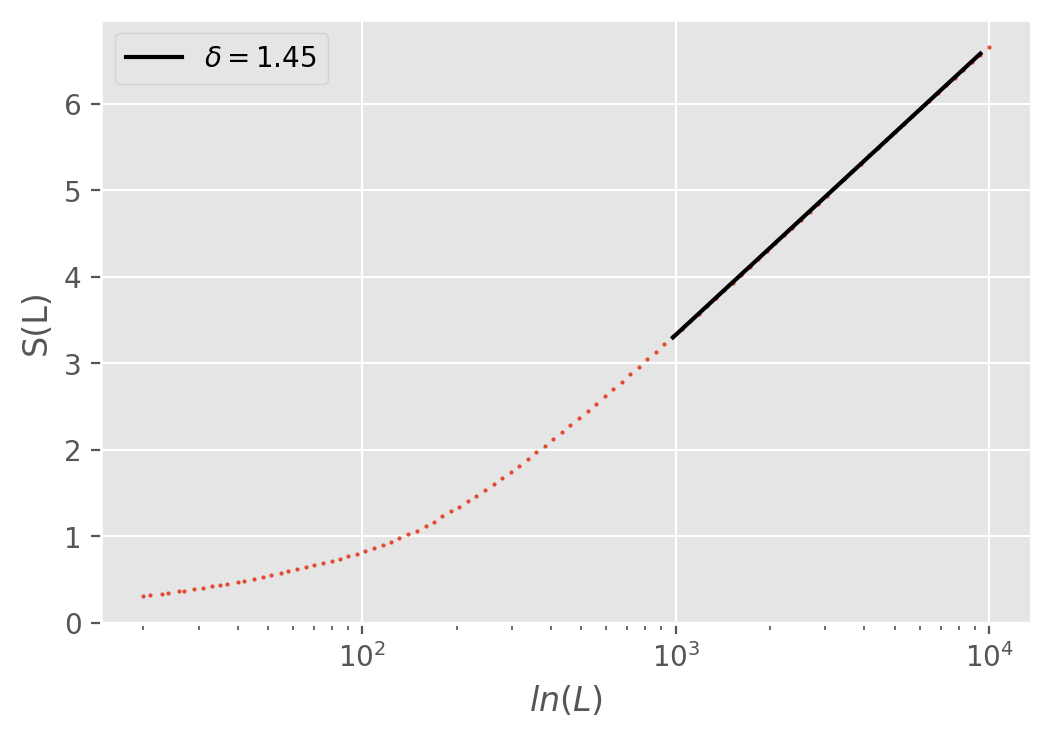

In [54]:
#for fitting and to get the scaling
start = 1*10**3
stop = 1*10**4
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
#plt.plot([], [], linestyle='', label='$\mu = $'+str(np.round(mu, 2)))
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

100%|██████████| 10000/10000 [30:15<00:00,  5.51it/s]


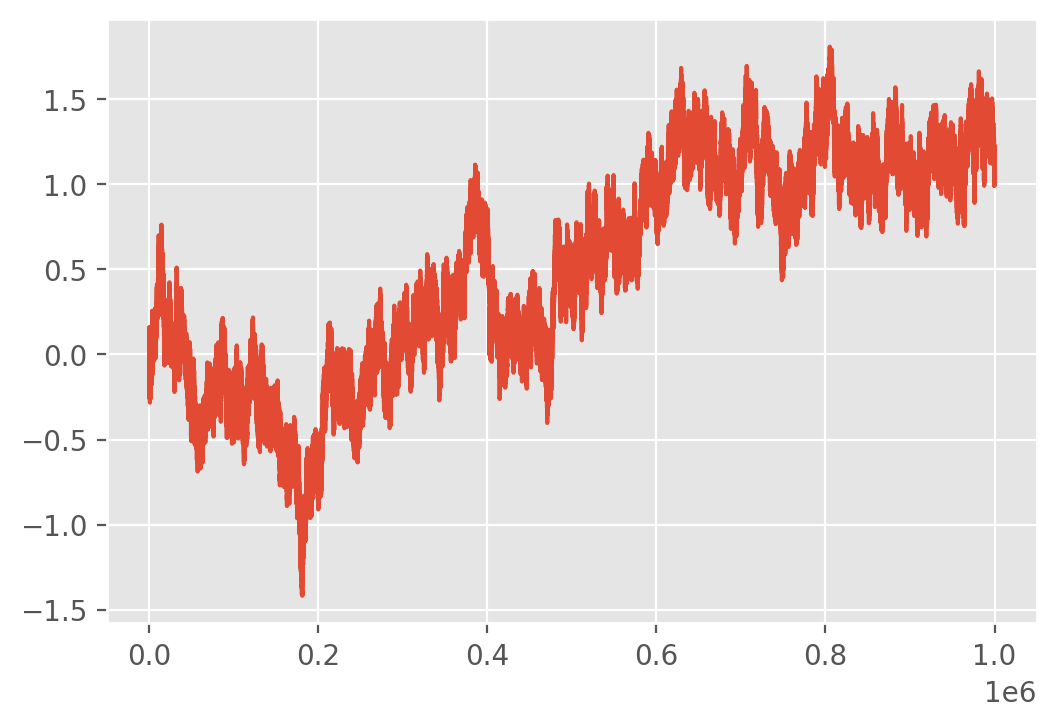

In [56]:
H=0.3
test = fbm(10**6, H)
_ = plt.plot(test)

# First we will consider drawing may trajectories with the random walk function.

step_constants = np.ones(10**4)

start = 0.0001
L = 10**4
lamb = 1/step_constants

fbm_trajs = np.zeros([len(lamb),L])

for q in tqdm(range(len(lamb))):
    fbm_trajs[q] = fbm(L-1,H)
    

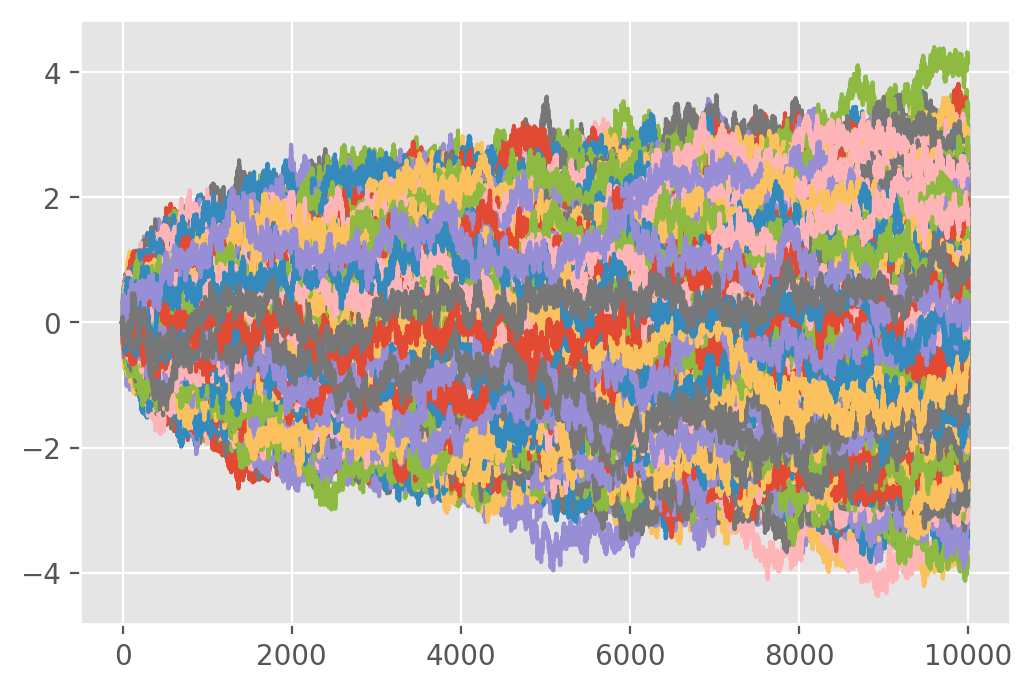

In [57]:
_=plt.plot(fbm_trajs.T)

In [63]:
data = fbm_trajs
number_of_points = 100
window_type = 'growing'
stripes = 500
show_plot=False

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
#window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
taus = np.diff(np.where(np.array(event_array[0]) == 1))
window_lengths = np.unique(np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array[0])==1)[0][-1]),number_of_points))).astype(int))


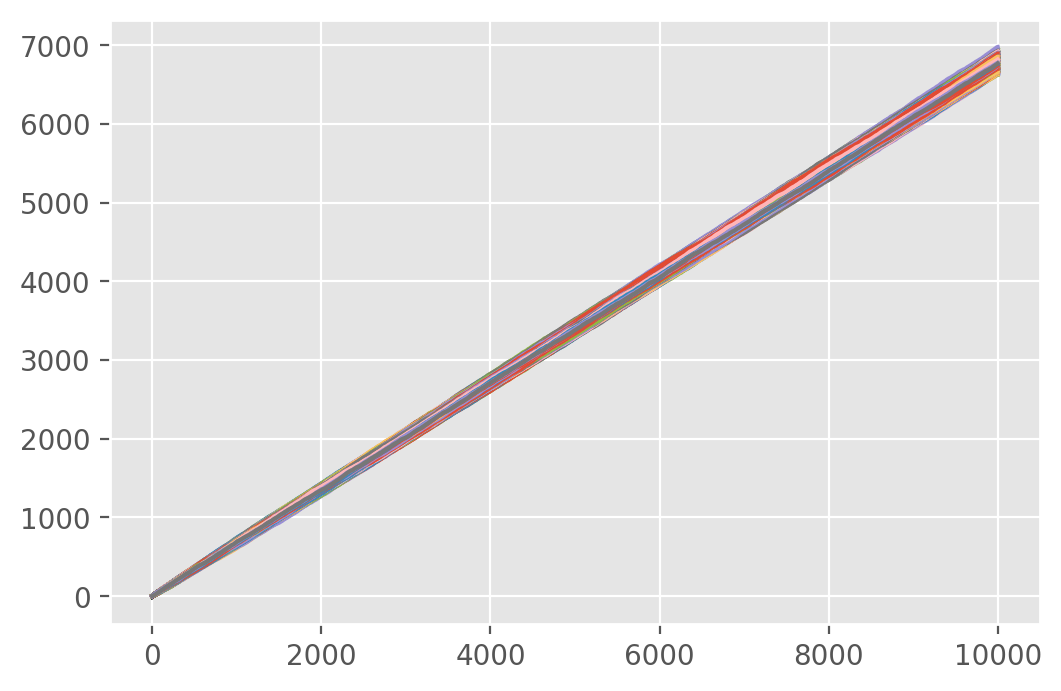

In [17]:
_=plt.plot(diffusion_trajectory.T)

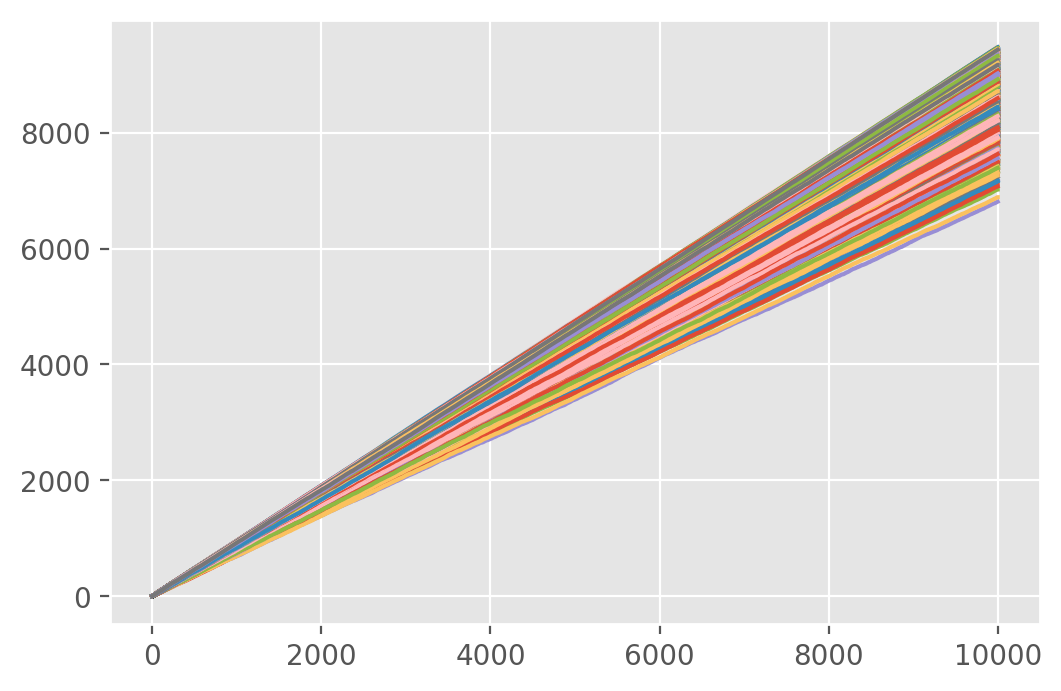

In [11]:
_=plt.plot(diffusion_trajectory.T)

In [64]:
trajectory=diffusion_trajectory
window_type='growing'

#new_entropy
#def entropy(trajectory, window_lengths, window_type):
"""
Calculates the Shannon Entropy of the diffusion trajectory.

Generates a range of window lengths L. Steps each one along 
`trajectory` and computes the displacement of `trajectory` 
over each window position. Bins these displacements, and divides 
by the sum of all bins to make the probability distribution `p`. 
Puts `p` into the equation for Shannon Entropy to get s(L).
Repeats for all L in range `WindowLengths`.

Parameters
----------
trajectory : array_like
    Diffusion trajectory. Constructed by make_trajectory.

Returns
----------
s : ndarray
    Shannon Entropy values, S(L).
window_lengths : ndarray
    Window lengths, L. 

Notes
----------
`tqdm()` makes the progress bar appear.
"""
#convert both list to numpy arrays.
trajectory = np.array(trajectory)
window_lengths = np.array(window_lengths)

#Now see if you have a list or a matrix.
if len(np.shape(trajectory)) < 2: #The shape of a matrix has 2 numbers.
    trajectory = np.array([trajectory]) #Make the list a psudo matrix with "[list]"

S = []
#window_lengths = np.arange(1, int(0.25*len(trajectory)), 1) #1000 poinrs
for L in tqdm(window_lengths):
    #Moving window (1 trajectory)
    if window_type == 'moving':
        window_starts = np.arange(0, np.shape(trajectory[0])-L, 1)
        window_ends = np.arange(L, np.shape(trajectory[0]), 1)
    #Growing window (multiple trajectories)
    elif window_type == 'growing':
        window_starts = 0
        window_ends = L
    #Displacements for trajectory
    displacements = trajectory[:,window_ends].T - trajectory[:,window_starts].T
            
    # #Now use a histogram
    bin_counts = np.bincount(displacements.flatten().astype(int))
    bin_counts = bin_counts[bin_counts != 0]
    
    # #Shannon Entropy
    P = bin_counts / np.sum(bin_counts)
    S.append(-np.sum(P * np.log(P)))
    #return S, window_lengths

    # counts, bin_edge = np.histogram(displacements, bins='doane')  # doane least bad for nongaussian
    # counts = np.array(counts[counts != 0])
    # binsize = bin_edge[1] - bin_edge[0]
    # P = counts / sum(counts)
    # S.append(-sum(P*np.log(P)) + np.log(binsize)) #Shannon Entropy

    s=S
    L=window_lengths

100%|██████████| 84/84 [00:00<00:00, 2418.53it/s]


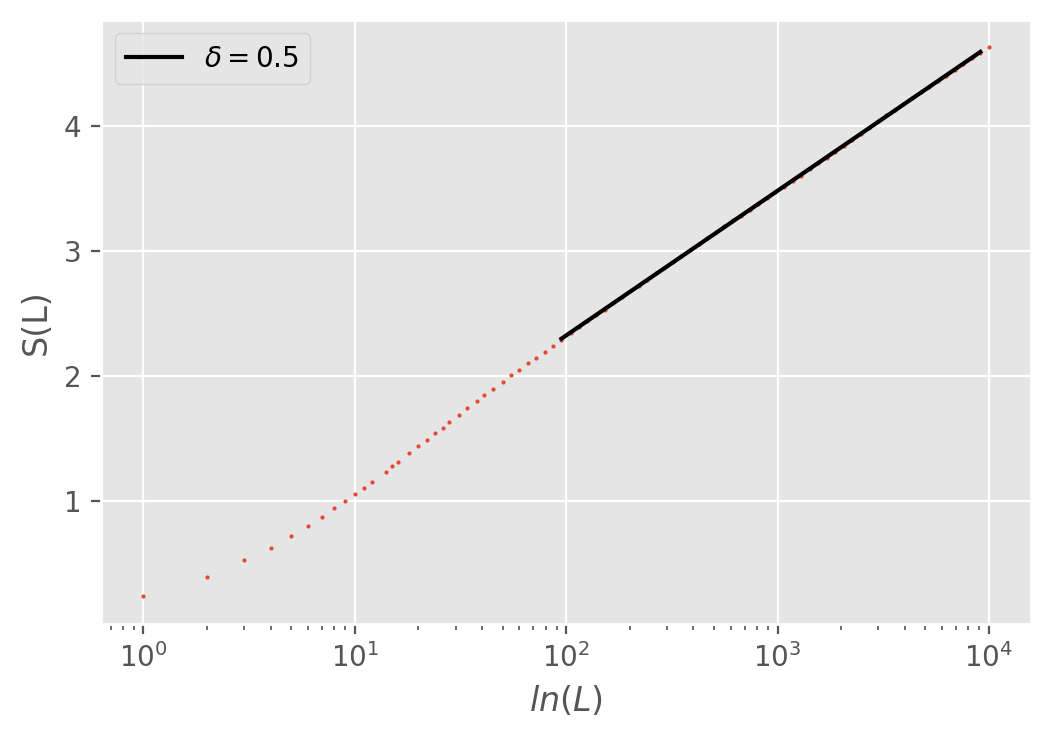

In [66]:
#for fitting and to get the scaling
start = 1*10**2
stop = 1*10**4
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
#plt.plot([], [], linestyle='', label='$\mu = $'+str(np.round(mu, 2)))
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [48]:
number_of_points = 100 #may not repeat
data = fbm_trajs

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data.T)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 83/83 [00:00<00:00, 458.34it/s]


In [61]:
data=fbm_trajs

trajectory=data
window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data.T)),np.log(len(data))/number_of_points)).astype(int))


#def no_stripe_entropy(trajectory, window_lengths):
"""
Calculates the Shannon Entropy of the diffusion trajectory.

Generates a range of window lengths L. Steps each one along 
`trajectory` and computes the displacement of `trajectory` 
over each window position. Bins these displacements, and divides 
by the sum of all bins to make the probability distribution `p`. 
Puts `p` into the equation for Shannon Entropy to get s(L).
Repeats for all L in range `WindowLengths`.

When imputing a matrix a growing window will be used.

Parameters
----------
trajectory : array_like
    Diffusion trajectory. FOR NO STRIPES JUST PASS THE DATA SERIES.

Returns
----------
S : ndarray
    Shannon Entropy values, S(L).
window_lengths : ndarray
    Window lengths, L.

Notes
----------
`tqdm()` makes the progress bar appear.
"""

#First convert both list to numpy arrays.
trajectory = np.array(trajectory)
window_lengths = np.array(window_lengths)
        
#Now see if you have a list or a matrix.
if len(np.shape(trajectory)) < 2: #The shape of a matrix has 2 numbers.
    trajectory = np.array([trajectory]) #Make the list a psudo matrix with "[list]"
    growing_window = False #Don't use the growing window.
else:
    growing_window = True #Use the growing window.
    
S = [] #This will hold the entropy.
for L in tqdm(window_lengths): #Step through each window length.
    if growing_window:
        window_starts = 0
        window_ends = L
    else:
        #Moving window
        window_starts = np.arange(0, np.shape(trajectory[0])-L, 1)
        window_ends = np.arange(L, np.shape(trajectory[0]), 1)
    traj = trajectory[:,window_starts].T - trajectory[:,window_ends].T
    counts, bin_edge = np.histogram(traj, bins='auto')  # doane least bad for nongaussian
    counts = np.array(counts[counts != 0])
    binsize = bin_edge[1] - bin_edge[0]
    P = counts / sum(counts)
    S.append(-sum(P*np.log(P)) + np.log(binsize)) #Shannon Entropy

    #  # #Now use a histogram
    # bin_counts = np.bincount(displacements.flatten().astype(int))
    # bin_counts = bin_counts[bin_counts != 0]
    
    # # #Shannon Entropy
    # P = bin_counts / np.sum(bin_counts)
    # S.append(-np.sum(P * np.log(P)))
 #   return S, window_lengths

    s=S
    L=window_lengths

100%|██████████| 83/83 [14:13:06<00:00, 616.70s/it]     


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


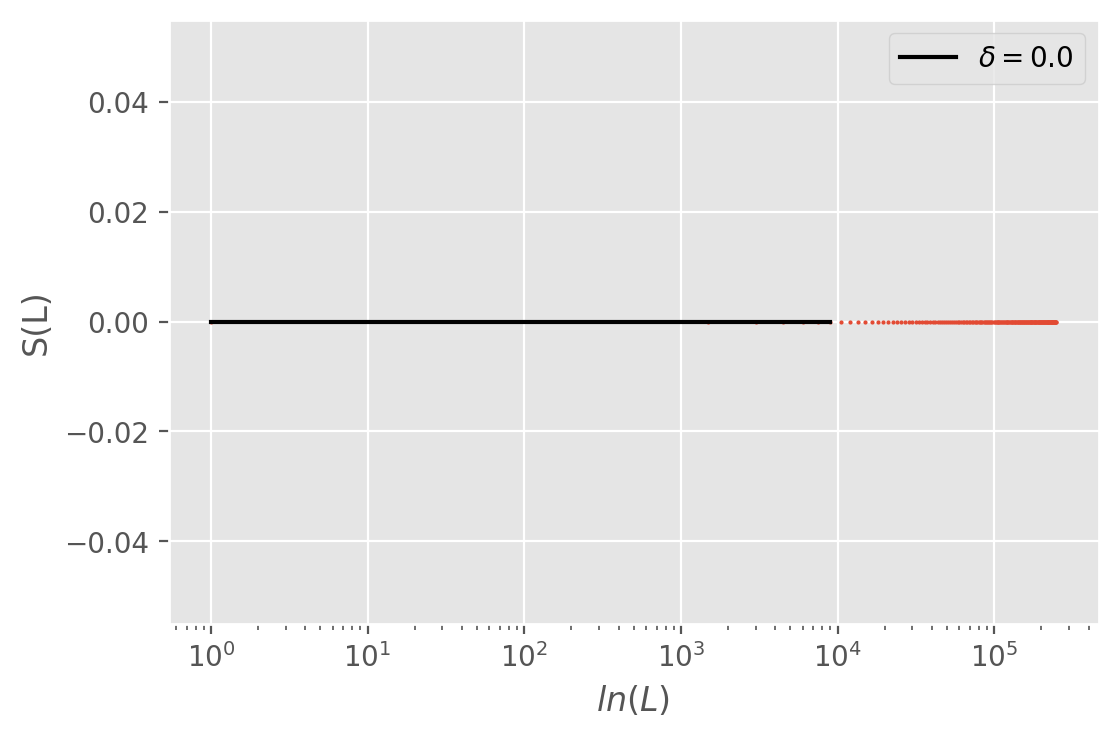

In [47]:
#for fitting and to get the scaling
start = 1*10**2
stop = 1*10**4
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
#plt.plot([], [], linestyle='', label='$\mu = $'+str(np.round(mu, 2)))
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [46]:
data = x
stripes = 150
show_plot = False

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
#taus = np.diff(np.where(np.array(event_array) == 1))
#window_lengths = np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array)==1)[0][-1]),100))).astype(int)
s, L = entropy(diffusion_trajectory, window_lengths, 'growing')

100%|██████████| 167/167 [00:00<00:00, 24382.94it/s]


In [225]:
data = x_trajs
stripes = 10**4
show_plot = False
window_type = 'growing'
number_of_points=100

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
#window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
taus = np.diff(np.where(np.array(event_array[0]) == 1))
window_lengths = np.unique(np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array[0])==1)[0][-1]),number_of_points))).astype(int))
s, L = entropy(diffusion_trajectory, window_lengths, window_type)

100%|██████████| 89/89 [00:00<00:00, 861.20it/s]


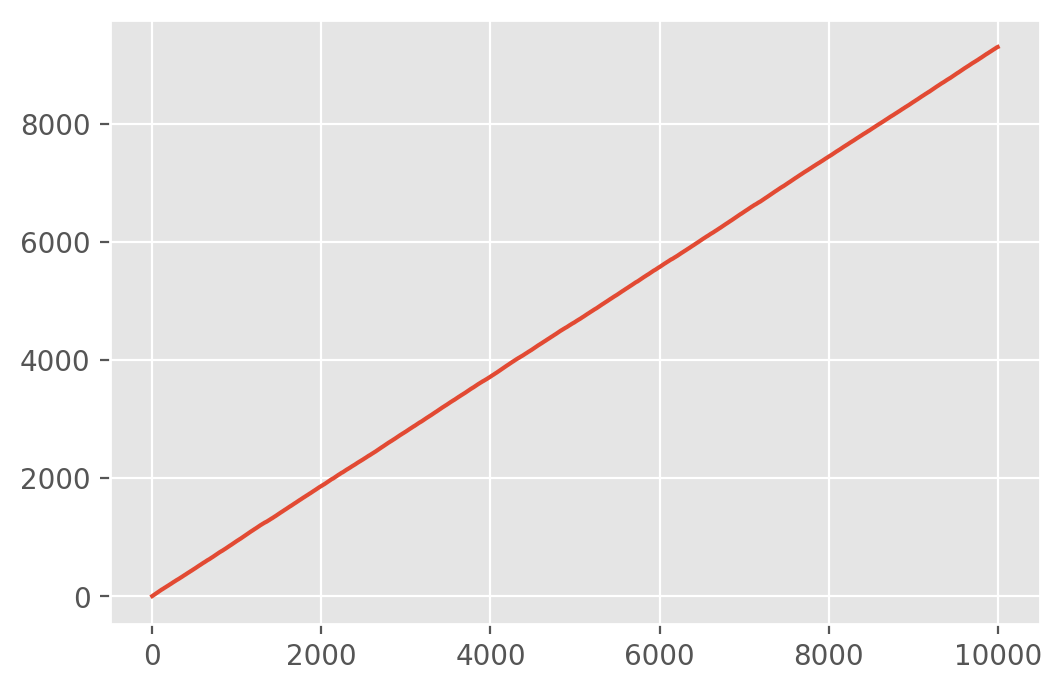

In [68]:
_=plt.plot(diffusion_trajectory[9999])

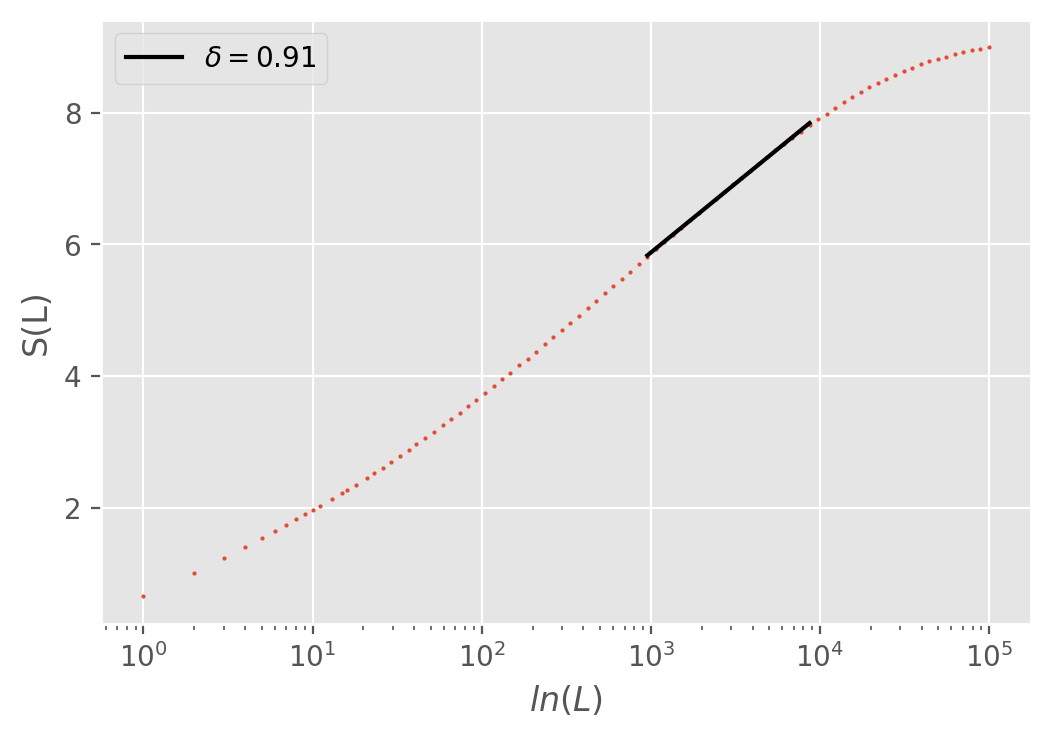

In [10]:
#for fitting and to get the scaling
start = 1*10**3
stop = 1*10**4
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
#plt.plot([], [], linestyle='', label='$\mu = $'+str(np.round(mu, 2)))
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [33]:
# First we will consider drawing may trajectories with the random walk function.

step_constants = np.ones(1000)

start = 0.0001
L = 10**5
lamb = 1/step_constants

x_trajs = np.zeros([len(lamb),L])

for q in range(len(lamb)):
    #x_trajs[q] = random_walk(start, L, lamb[q]) 
    x_trajs[q] = np.cumsum(random_walk(start, L, lamb[q]))
    
    
#plt.plot(x_trajs)

Text(0, 0.5, 'y')

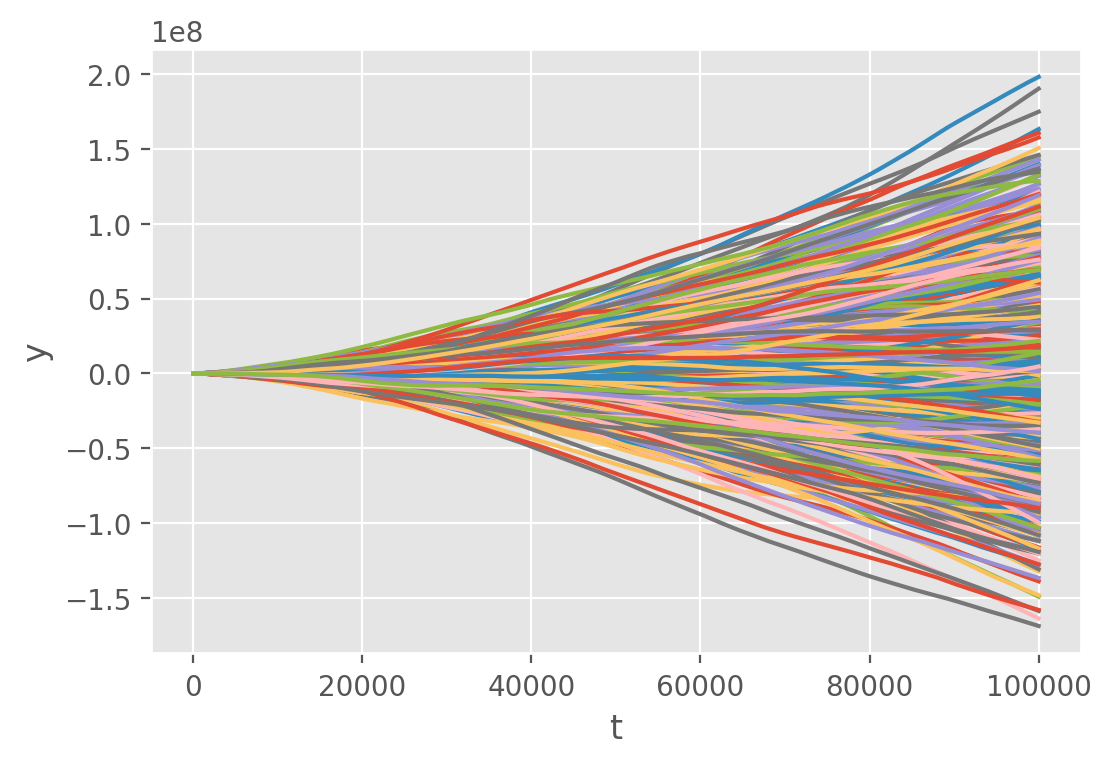

In [34]:
_ = plt.plot(x_trajs.T)
plt.xlabel('t')
plt.ylabel('y')

In [35]:
number_of_points = 100 #may not repeat
data = x_trajs

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data.T)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 141/141 [00:00<00:00, 1854.20it/s]


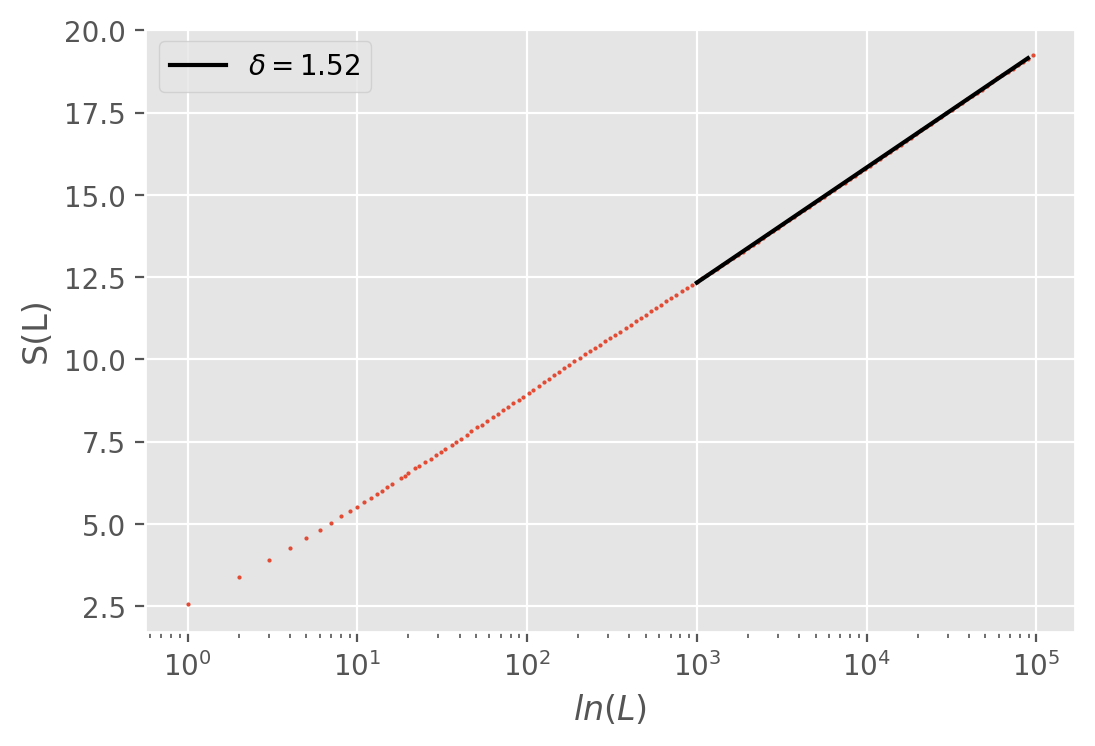

In [36]:
#for fitting and to get the scaling
start = 1*10**3
stop = 1*10**6
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
#plt.plot([], [], linestyle='', label='$\mu = $'+str(np.round(mu, 2)))
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)